# Artificial Neural Network

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.20.0'

## Part 1 - Data Preprocessing

### Importing the Dataset

In [3]:
dataset = pd.read_excel('dataset/powerplant.xlsx')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the Dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Part 2 - Building the ANN

### Initializing the ANN

In [5]:
ann = tf.keras.models.Sequential()

### Adding the Input Layer, and the First Hidden Layer

In [6]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the Second Layer

In [7]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the Output Layer

In [8]:
ann.add(tf.keras.layers.Dense(units = 1))

## Part 3 - Training the ANN

### Compiling the ANN

In [9]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN Model on the Training Set

In [10]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 120)

Epoch 1/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5719.9575 
Epoch 2/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 248.9353
Epoch 3/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 228.7300
Epoch 4/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 205.4761
Epoch 5/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 179.9674
Epoch 6/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 155.3066
Epoch 7/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 131.3503
Epoch 8/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 109.1395
Epoch 9/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 89.7880
Epoch 10/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73.4716
Epoch 11/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 60.5194
Epoch 12/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 50.4275
Epoch 13/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 44.0282
Epoch 14/120
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39.7110
Epoch 15/120
240/24

### Predicting the Results of the Test Set

In [13]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[456.64 455.27]
 [438.86 436.31]
 [433.71 440.68]
 ...
 [481.14 479.53]
 [435.82 435.76]
 [459.95 457.1 ]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 3.98
MSE: 24.86
R²: 0.9143


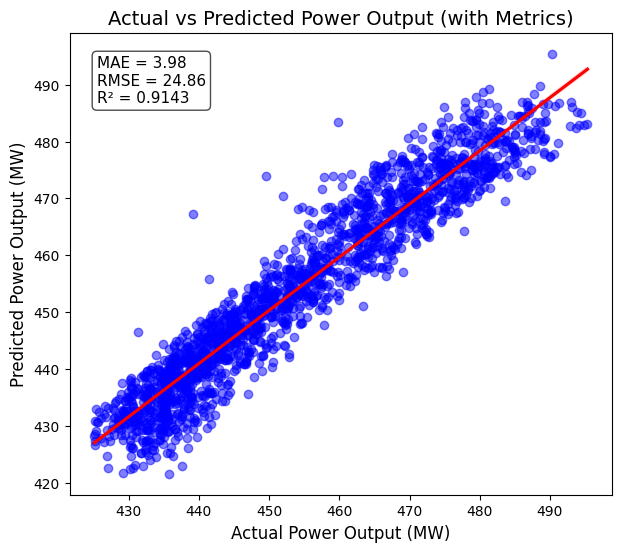

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Actual Power Output (MW)', fontsize=12)
plt.ylabel('Predicted Power Output (MW)', fontsize=12)
plt.title('Actual vs Predicted Power Output (with Metrics)', fontsize=14)

# Add text box with metrics
textstr = f"MAE = {mae:.2f}\nRMSE = {mse:.2f}\nR² = {r2:.4f}"
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
plt.show()

#### This scatter plot compares the actual power output values from the test dataset (x-axis) with the predicted power output values generated by the trained ANN model (y-axis).
#### Each blue dot represents one test data point.
#### The red line represents the ideal prediction line where predicted values = actual values.
#### Points that fall close to the red line indicate accurate predictions, while points that deviate from it show prediction errors.